In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<b>İçindekiler / Table of Contents</b>

1. Kütüphanelerin Yüklenmesi ve Veri Okuma
   
   1.1. Pandas, NumPy, Seaborn, Matplotlib

   1.2. CSV dosyasının yüklenmesi (Cancer_Data.csv)

   1.3. İlk bakış (head()) ve veri özetleri

2. Veri Keşfi (EDA)

   2.1. Veri boyutu, sütunlar ve tipleri (df.shape, df.info(), df.dtypes)

   2.2. Eksik değer kontrolü (isnull().sum())

   2.3. Temel istatistikler (describe().T)

   2.4. Korelasyon analizi ve heatmap

   2.5. Duplicate veri kontrolü


3. Veri Ön İşleme

   3.1. Gereksiz sütunların düşürülmesi (id)
   
   3.2. Sütunlardaki unique değerlerin analizi (df_uniques)
   
   3.3. Binary sütunların integer’a çevrilmesi (diagnosis: B→0, M→1)
   

4. Train-Test Split ve Ölçeklendirme

   4.1. Özellik ve hedef değişkenlerin ayrılması (X, y)
   
   4.2. Train-test split (train_test_split)
   
   4.3. Kolon bazlı scaling: StandardScaler, MinMaxScaler, RobustScaler
   
   4.4. ColumnTransformer ile tüm veri setine uygulama
   

5. KNN Modeli ile Tahmin

   5.1. İlk model eğitimi (n_neighbors=3)
   
   5.2. Tahmin ve performans ölçümleri: classification_report, accuracy_score, f1_score
   
   5.3. Confusion Matrix ve görselleştirme
   

6. Hiperparametre Optimizasyonu (k değeri)

   6.1. Farklı k değerlerinde F1 Score ve Error Rate analizi (max_k=40)
   
   6.2. Sonuçların tablolar halinde gösterilmesi (f1_result_df, error_rate_df)
   
   6.3. En iyi performans: k=12 veya k=13
   

7. F1 Score Görselleştirmesi

   7.1. K değerine göre F1 Score çizimi (line plot)
   
   7.2. X-ticks ve grafik detayları
   

8. Final Model Eğitimi

   8.1. Seçilen en iyi k değeri ile KNN modelini yeniden eğitme (n_neighbors=9)
   
   8.2. Tahmin ve performans ölçümleri
   
   8.3. Precision, Recall, F1 Score analizi
   
   8.4. Genel yorum ve modelin güvenilirliği
   

In [120]:
df= pd.read_csv(filepath_or_buffer='data/Cancer_Data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


pip install jinja2 --- terminal e yüklelim

In [87]:
df.iloc[:20].style.background_gradient(cmap='viridis')

#küçükler mor büyükler sarı gözükmektedir

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,1.095000,0.905300,8.589000,153.400000,0.006399,0.049040,0.053730,0.015870,0.030030,0.006193,25.380000,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900
1,842517,M,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,0.543500,0.733900,3.398000,74.080000,0.005225,0.013080,0.018600,0.013400,0.013890,0.003532,24.990000,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020
2,84300903,M,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,0.745600,0.786900,4.585000,94.030000,0.006150,0.040060,0.038320,0.020580,0.022500,0.004571,23.570000,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580
3,84348301,M,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,0.495600,1.156000,3.445000,27.230000,0.009110,0.074580,0.056610,0.018670,0.059630,0.009208,14.910000,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000
4,84358402,M,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,0.757200,0.781300,5.438000,94.440000,0.011490,0.024610,0.056880,0.018850,0.017560,0.005115,22.540000,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780
5,843786,M,12.450000,15.700000,82.570000,477.100000,0.127800,0.170000,0.157800,0.080890,0.208700,0.076130,0.334500,0.890200,2.217000,27.190000,0.007510,0.033450,0.036720,0.011370,0.021650,0.005082,15.470000,23.750000,103.400000,741.600000,0.179100,0.524900,0.535500,0.174100,0.398500,0.124400
6,844359,M,18.250000,19.980000,119.600000,1040.000000,0.094630,0.109000,0.112700,0.074000,0.179400,0.057420,0.446700,0.773200,3.180000,53.910000,0.004314,0.013820,0.022540,0.010390,0.013690,0.002179,22.880000,27.660000,153.200000,1606.000000,0.144200,0.257600,0.378400,0.193200,0.306300,0.083680
7,84458202,M,13.710000,20.830000,90.200000,577.900000,0.118900,0.164500,0.093660,0.059850,0.219600,0.074510,0.583500,1.377000,3.856000,50.960000,0.008805,0.030290,0.024880,0.014480,0.014860,0.005412,17.060000,28.140000,110.600000,897.000000,0.165400,0.368200,0.267800,0.155600,0.319600,0.115100
8,844981,M,13.000000,21.820000,87.500000,519.800000,0.127300,0.193200,0.185900,0.093530,0.235000,0.073890,0.306300,1.002000,2.406000,24.320000,0.005731,0.035020,0.035530,0.012260,0.021430,0.003749,15.490000,30.730000,106.200000,739.300000,0.170300,0.540100,0.539000,0.206000,0.437800,0.107200
9,84501001,M,12.460000,24.040000,83.970000,475.900000,0.118600,0.239600,0.227300,0.085430,0.203000,0.082430,0.297600,1.599000,2.039000,23.940000,0.007149,0.072170,0.077430,0.014320,0.017890,0.010080,15.090000,40.680000,97.650000,711.400000,0.185300,1.058000,1.105000,0.221000,0.436600,0.207500


In [88]:
df.shape

(569, 32)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [90]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [91]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [92]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [93]:
df.duplicated().sum()

np.int64(0)

In [94]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [95]:
df.corr(numeric_only=True)

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.082405,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,-0.012968,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.000096,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.050080,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.044158,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,-0.022114,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

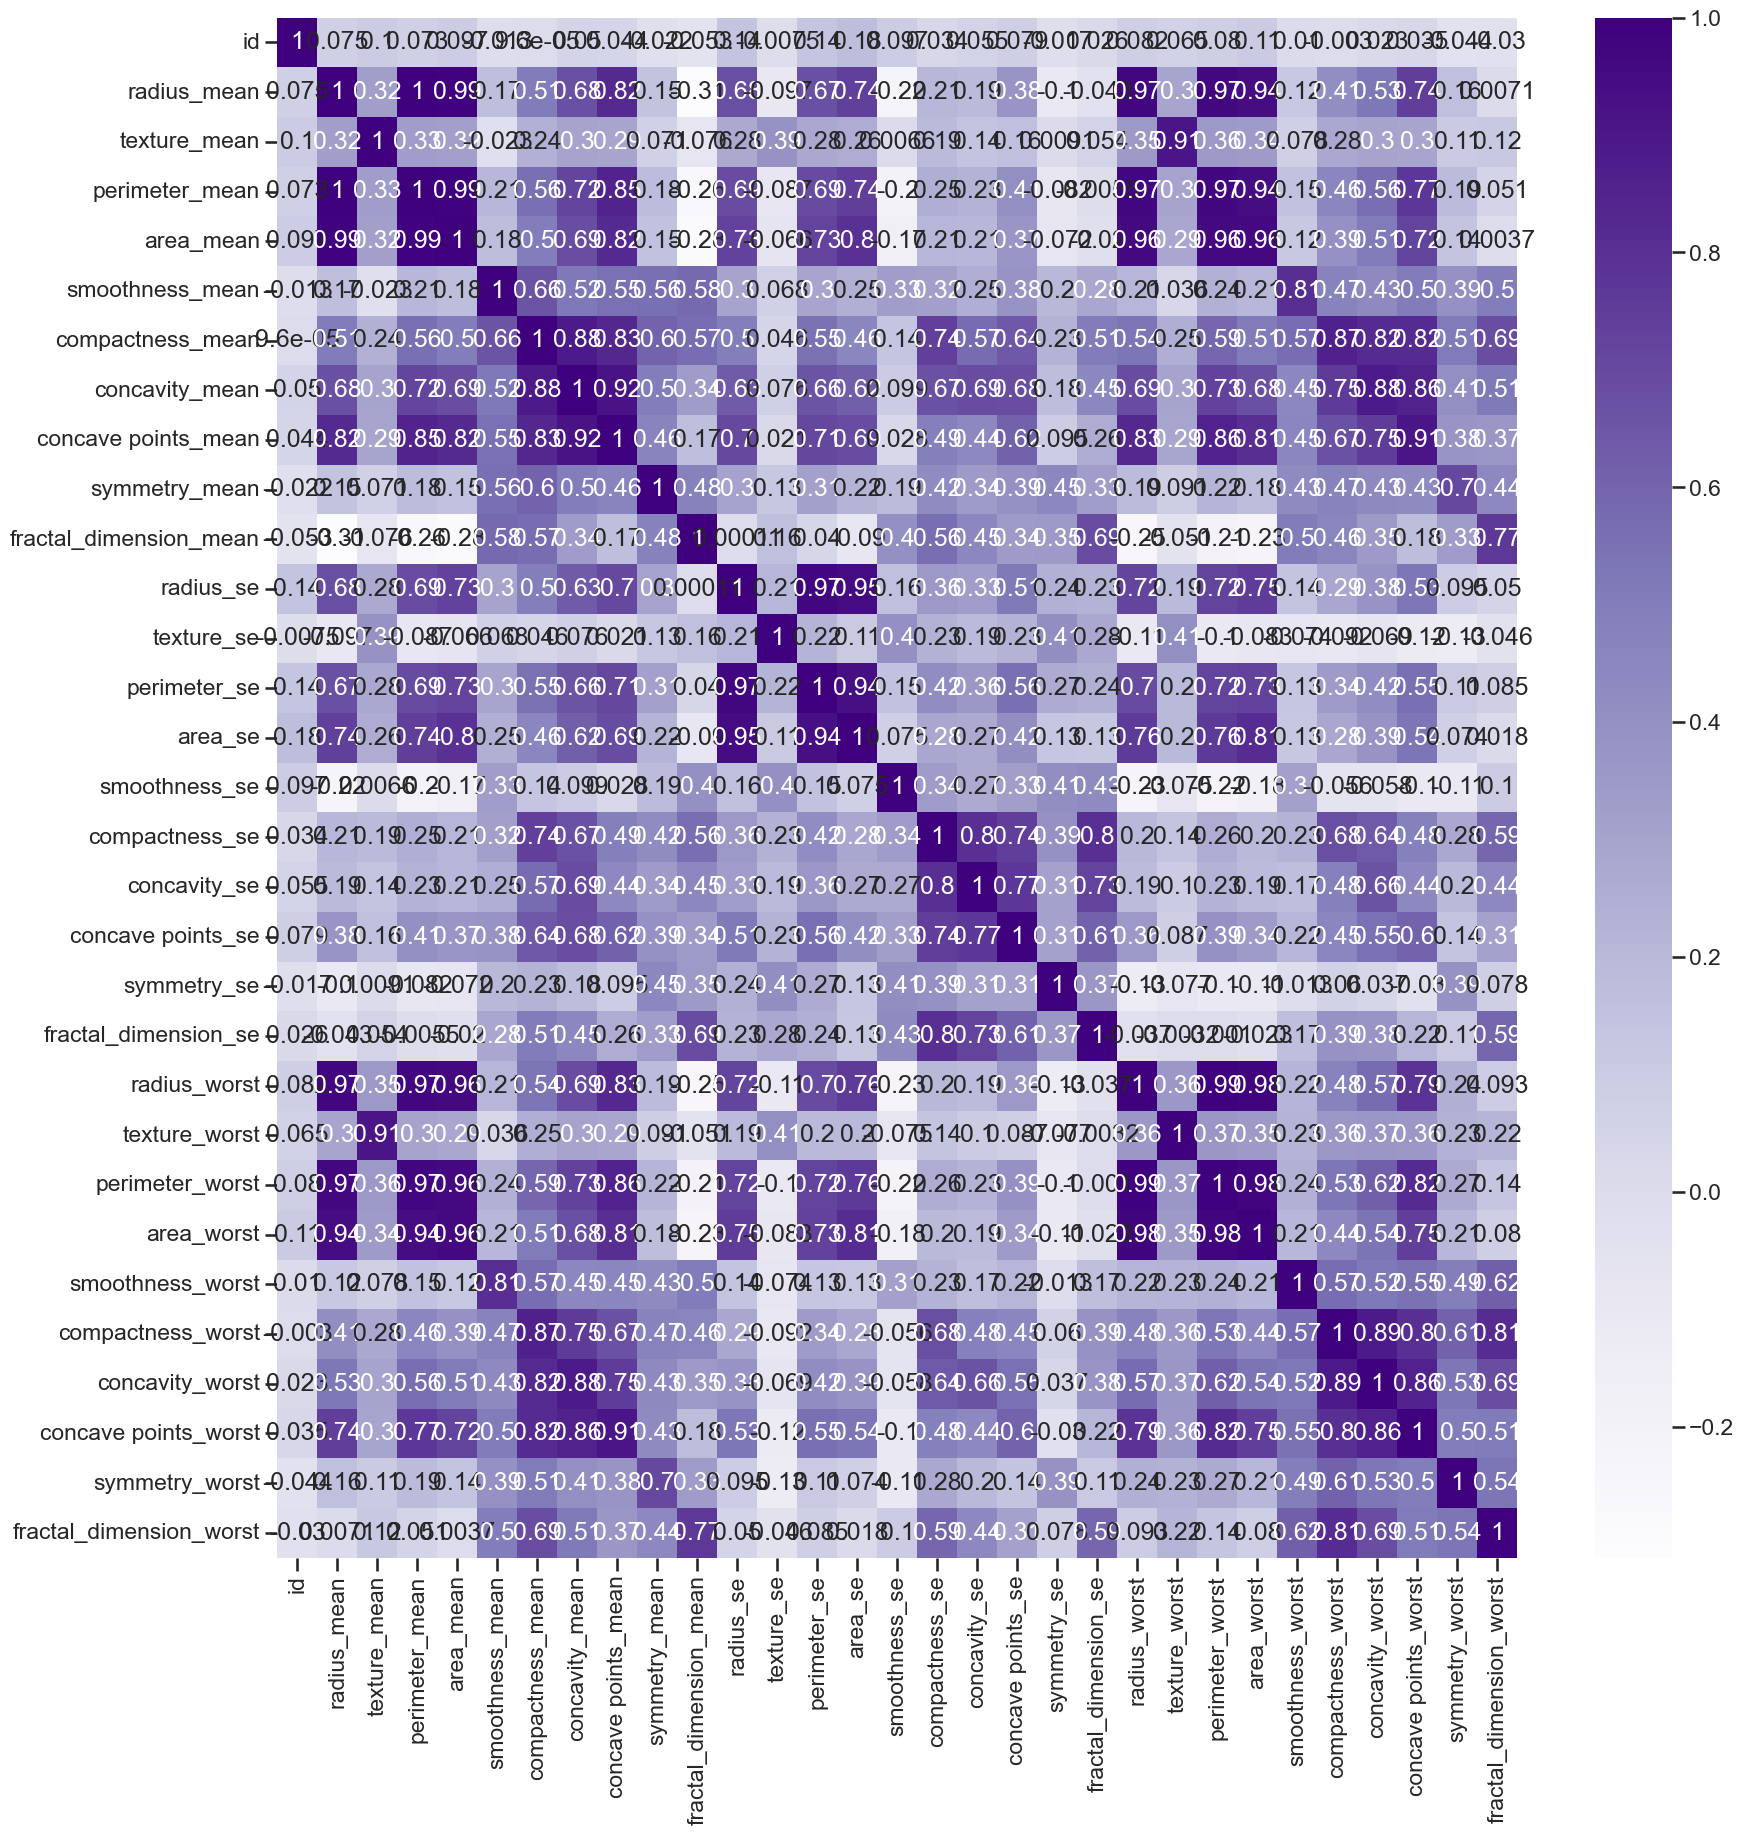

In [96]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Purples')

In [97]:
# Gereksizm sütunları drop edelim

df = df.drop('id', axis=1)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [98]:
round(df.describe(),2).T

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
texture_mean,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
perimeter_mean,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
area_mean,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
smoothness_mean,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness_mean,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity_mean,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave points_mean,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry_mean,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
fractal_dimension_mean,569.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


In [99]:
# object tipinde olanlar için bu şekilde describe edebiliriz

df.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


In [100]:
# bütün veri setinde kaç farklı değer olduğununa bakalım

[
    [col, len(df[col].unique())] for col in df.columns
]

[['diagnosis', 2],
 ['radius_mean', 456],
 ['texture_mean', 479],
 ['perimeter_mean', 522],
 ['area_mean', 539],
 ['smoothness_mean', 474],
 ['compactness_mean', 537],
 ['concavity_mean', 537],
 ['concave points_mean', 542],
 ['symmetry_mean', 432],
 ['fractal_dimension_mean', 499],
 ['radius_se', 540],
 ['texture_se', 519],
 ['perimeter_se', 533],
 ['area_se', 528],
 ['smoothness_se', 547],
 ['compactness_se', 541],
 ['concavity_se', 533],
 ['concave points_se', 507],
 ['symmetry_se', 498],
 ['fractal_dimension_se', 545],
 ['radius_worst', 457],
 ['texture_worst', 511],
 ['perimeter_worst', 514],
 ['area_worst', 544],
 ['smoothness_worst', 411],
 ['compactness_worst', 529],
 ['concavity_worst', 539],
 ['concave points_worst', 492],
 ['symmetry_worst', 500],
 ['fractal_dimension_worst', 535]]

In [101]:
# Path I
# df_uniques = pd.DataFrame({
#     'Variable Name' : df.columns,
#     'Uniques Values' : [[col, len(df[col].unique())] for col in df.columns]
# }).set_index('Variable Name') # set_index() fonksiyonu ile indexlere numara yerine sütunaların adını veriyoruz

# Path II
df_uniques = pd.DataFrame(
    data = [[col, len(df[col].unique())]  for col in df.columns],
    columns=['Variable Name', 'Unique Values']
).set_index('Variable Name') # set_index() fonksiyonu ile indexlere numara yerine sütunaların adını veriyoruz
df_uniques


df_uniques

,Unique Values
Variable Name,
diagnosis,2
radius_mean,456
texture_mean,479
perimeter_mean,522
area_mean,539
smoothness_mean,474
compactness_mean,537
concavity_mean,537
concave points_mean,542


In [102]:
# İçerisinde sadece B ve M olan diagnosis olan sütunu integera çevirlelim
# M = Malignant / kötü huylu, B = Benign / iyi huylu).


# Path I

# map_diagnosis = {
#     'B' : 0,
#     'M' : 1
# }

# df['diagnosis'] = df['diagnosis'].map(map_diagnosis)

# df.head(20)

# bu yöntem tek bir tane binary olduğu için pratik gözükmekte fakat birden fazla binary olduğunda 


In [103]:
# Path II

binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
binary_variables

['diagnosis']

In [104]:

# Path II
# Data Preprocessing

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder


lb, le = LabelBinarizer(), LabelEncoder()


df["diagnosis"] = le.fit_transform(df["diagnosis"])  # 0 = B, 1 = M


df.head(20)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [105]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


## Train Test Split

In [106]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Ölçeklendirme (Scaling)

In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


# Kolon seçimleri
standart_cols = [c for c in X.columns if "_mean" in c]
minmax_cols = [c for c in X.columns if "_worst" in c]
robust_cols = list(set(X.columns) - set(standart_cols) - set(minmax_cols))

# ColumnTransformer tanımı
ct = ColumnTransformer([
        ("standard", StandardScaler(), standart_cols),
        ("minmax", MinMaxScaler(), minmax_cols),
        ("robust", RobustScaler(), robust_cols)
    ],
    remainder='passthrough'
)

# dönüşümü uygula

scaled_data = ct.fit_transform(df)

#4 yeni sütun isimlerini oluştur

new_columns = (
    robust_cols +
    minmax_cols +
    standart_cols +
    [col for col in df.columns if col not in robust_cols + minmax_cols + standart_cols]
)

# 5 dataframe çevir 

scaled_df =pd.DataFrame(
    data=scaled_data,
    columns=new_columns
)

scaled_df['diagnosis'] = y.values

scaled_df.head()


,area_se,perimeter_se,texture_se,compactness_se,concave points_se,concavity_se,radius_se,fractal_dimension_se,smoothness_se,symmetry_se,...,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,diagnosis
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,3.599086,-0.316669,1.475994,0.698529,1.032641,3.126978,1.301299,0.006382,1.358173,1
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,0.634495,-0.584440,-0.380485,0.349265,-0.270401,0.889655,0.149351,-0.387974,-0.581731,1
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.312393,-0.501640,1.012390,1.364536,0.461053,1.709533,0.599134,-0.077259,0.453125,1
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,0.661336,0.074988,2.794528,1.094457,1.139466,0.695335,2.606494,0.917031,4.915865,1
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.799543,-0.510389,0.214765,1.119910,1.149481,1.756592,0.834632,1.716493,-0.140625,1


In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score


knn= KNeighborsClassifier(n_neighbors=3)
knn= knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print(classification_report(y_test, y_pred))
print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred),2)}')
print(f'F1 Score: {round(f1_score(y_test,y_pred),2)}')


              precision    recall  f1-score   support

           0       0.94      0.94      0.94        89
           1       0.91      0.91      0.91        54

    accuracy                           0.93       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.93      0.93      0.93       143

Accuracy Score: 0.93
F1 Score: 0.91


### 1 Test setinde %93 doğruluk, yani modelin tahminlerinin çoğu doğru.
### 2 Malignant (1) sınıfı için F1 = 0.91 → hem precision hem recall dengeli ve yüksek.
### 3 Bu, kötü huylu tümörleri tespit etmede modelin güvenilir olduğunu gösteriyor.
### 4 Class 0 (Benign): Precision & Recall = 0.94 → iyi, yanlış sınıflandırmalar az.
### 5 Class 1 (Malignant): Precision & Recall = 0.91 → kötü huylu vakaları doğru tespit edebilme oranı yüksek.
### 6 Macro ve weighted ortalama F1 = 0.93 → genel olarak çok iyi performans.

In [110]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print(f'True Negative: {TN}\nFalse Negative:  {FN}\nTrue Positive: {TP}\nFalse Positive: {FP}')

True Negative: 84
False Negative:  5
True Positive: 49
False Positive: 5


TN (True Negative): Gerçekten benign olan 84 örnek doğru şekilde benign olarak tahmin edilmiş.

FP (False Positive): Gerçek benign ama yanlışlıkla malignant tahmin edilen 5 örnek.

TP (True Positive): Gerçekten malignant olan 49 örnek doğru şekilde malignant tahmin edilmiş.

FN (False Negative): Gerçek malignant ama benign tahmin edilen 5 örnek.

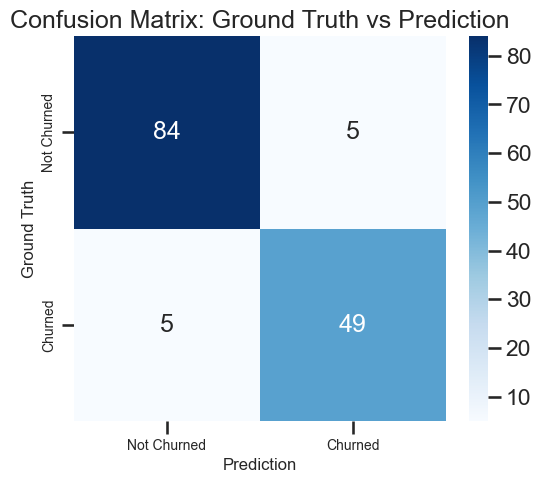

In [111]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
labels = ["Not Churned", "Churned"]

ax = sns.heatmap(cm,
                 annot=True,
                 fmt="d",
                 cmap="Blues",
                 xticklabels=labels,
                 yticklabels=labels)

plt.title("Confusion Matrix: Ground Truth vs Prediction")
ax.set_xlabel("Prediction", fontsize=12)
ax.set_ylabel("Ground Truth", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [112]:
max_k = 40
f1_scores = list()
error_rate = list()

for k in range(1, max_k):
    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights='distance',
        metric='euclidean',
        p=2
    )

    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(
        (k, round(f1, 4))
    )

    error = 1 - round(accuracy_score(y_test, y_pred), 4)
    error_rate.append(
        (k, error)
    )

f1_result_df = pd.DataFrame(
    data = f1_scores,
    columns=['K', 'F1 Score']
)

error_rate_df = pd.DataFrame(
    data=error_rate,
    columns=['K', 'Error Rate']
)

In [113]:
f1_result_df.sort_values(by='F1 Score', ascending=False).head()

,K,F1 Score
12,13,0.9623
11,12,0.9623
14,15,0.9533
13,14,0.9533
15,16,0.9533


In [114]:
error_rate_df.sort_values(by='Error Rate', ascending=False).head()

,K,Error Rate
0,1,0.0699
1,2,0.0699
2,3,0.0629
3,4,0.0629
5,6,0.0559


Sonuç

En iyi performans için k=12 veya k=13 seçilmeli.

Error rate açısından da bu k değerleri gayet düşük (≈ %3.7 civarında çıkması lazım).

k=1–2 gibi çok küçük değerlerde model daha fazla hata yapıyor.

<Figure size 1920x1440 with 0 Axes>

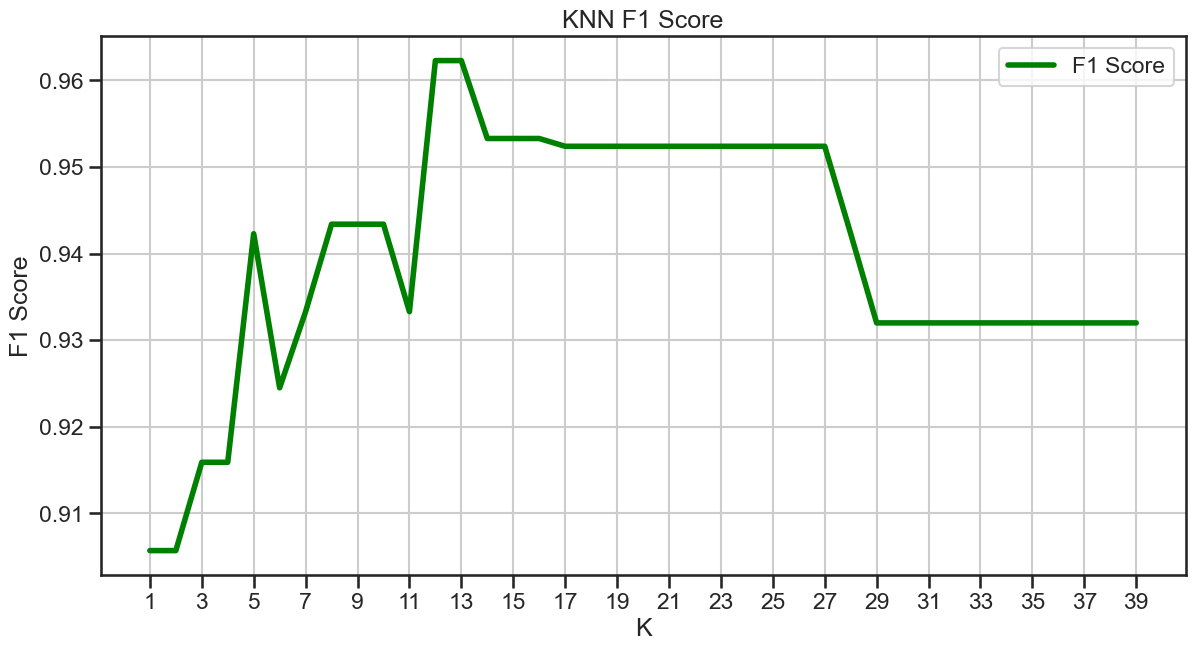

In [118]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)

ax=(f1_result_df
        .set_index('K')
        .plot(
            color='green',
            figsize=(14, 7),
            linewidth = 4
        )
    )
ax.set(
    xlabel = 'K',
    ylabel = 'F1 Score'
)

ax.set_xticks(
    range(1, max_k, 2)
)

plt.title('KNN F1 Score')
plt.grid()
plt.show()

In [119]:
knn = KNeighborsClassifier(
        n_neighbors=9,
        weights='distance',
        metric='euclidean',
        p=2
    )

knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Report')
print('===============================================================')
print(classification_report(y_test, y_pred))
print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred),2)}')
print(f'F1 Score: {round(f1_score(y_test,y_pred),2)}')

Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        89
           1       0.96      0.93      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.96       143
weighted avg       0.96      0.96      0.96       143

Accuracy Score: 0.96
F1 Score: 0.94


Accuracy: 0.96 → Test setindeki tahminlerin %96’sı doğru.

F1 Score (Class 1 / Malignant): 0.94 → Hem precision hem recall dengeli ve yüksek.

Precision / Recall:

Class 0 (Benign / Not Churned): Precision 0.96, Recall 0.98 → Yanlış negatif çok az, iyi sınıflandırılmış.

Class 1 (Malignant / Churned): Precision 0.96, Recall 0.93 → Kötü huylu vakaları çoğunlukla doğru tespit ediyor; küçük bir miktar FN var.

Macro & Weighted Avg F1: 0.96 → Genel olarak model güçlü ve dengeli.


Bu model, kötü huylu tümörleri tespit etmek için güvenilir.

Yanlış negatifler (FN = 5) tıbbi açıdan kritik olabilir ama oran düşük.

Accuracy ve F1 Score birbirine yakın olduğu için sınıflar arası dengesizlik KNN için problem olmamış.